## The purpose of this file
Delve into the backbone of temporal network, or significant ties, and draw it in a rational way with graph-tool.

In [1]:
import sys
sys.path.append('../')
import toolbox as tb
import graph_tool.all as gt

In [2]:
tag = "momiji"
hashtag = "紅葉" 
timespan = "24-24"
tau = 75
SL1 = "B0001"
SL2 = "B001"
G1 = gt.load_graph(f'../data/graph_data/{tag}/backbone/{hashtag}_{timespan}_{tau}_backbone_{SL1}.graphml')
#G2 = gt.load_graph(f'../data/graph_data/{tag}/backbone/{hashtag}_{timespan}_{tau}_backbone_{SL2}.graphml')

In [3]:
print(G1.num_vertices(), G1.num_edges())
#print(G2.num_vertices(), G2.num_edges())

3022 4453


In [4]:
# Save figure for future use
extension = "svg"
fname1 = f"../data/figure/network/B0001ALL_{hashtag}_{timespan}_{tau}.{extension}"
fname2 = f"../data/figure/network/B001ALL_{hashtag}_{timespan}_{tau}.{extension}"
fname3 = f"../data/figure/network/B0001LargestComponent_{hashtag}_{timespan}_{tau}.{extension}"
fname4 = f"../data/figure/network/B001LargestComponent_{hashtag}_{timespan}_{tau}.{extension}"
fname5 = f"../data/figure/network/B0001NestedCommunity_{hashtag}_{timespan}_{tau}.{extension}"
fname6 = f"../data/figure/network/B0001Community_{hashtag}_{timespan}_{tau}.{extension}"
fname7 = f"../data/figure/network/B0001AllNestedCommunity_{hashtag}_{timespan}_{tau}.{extension}"

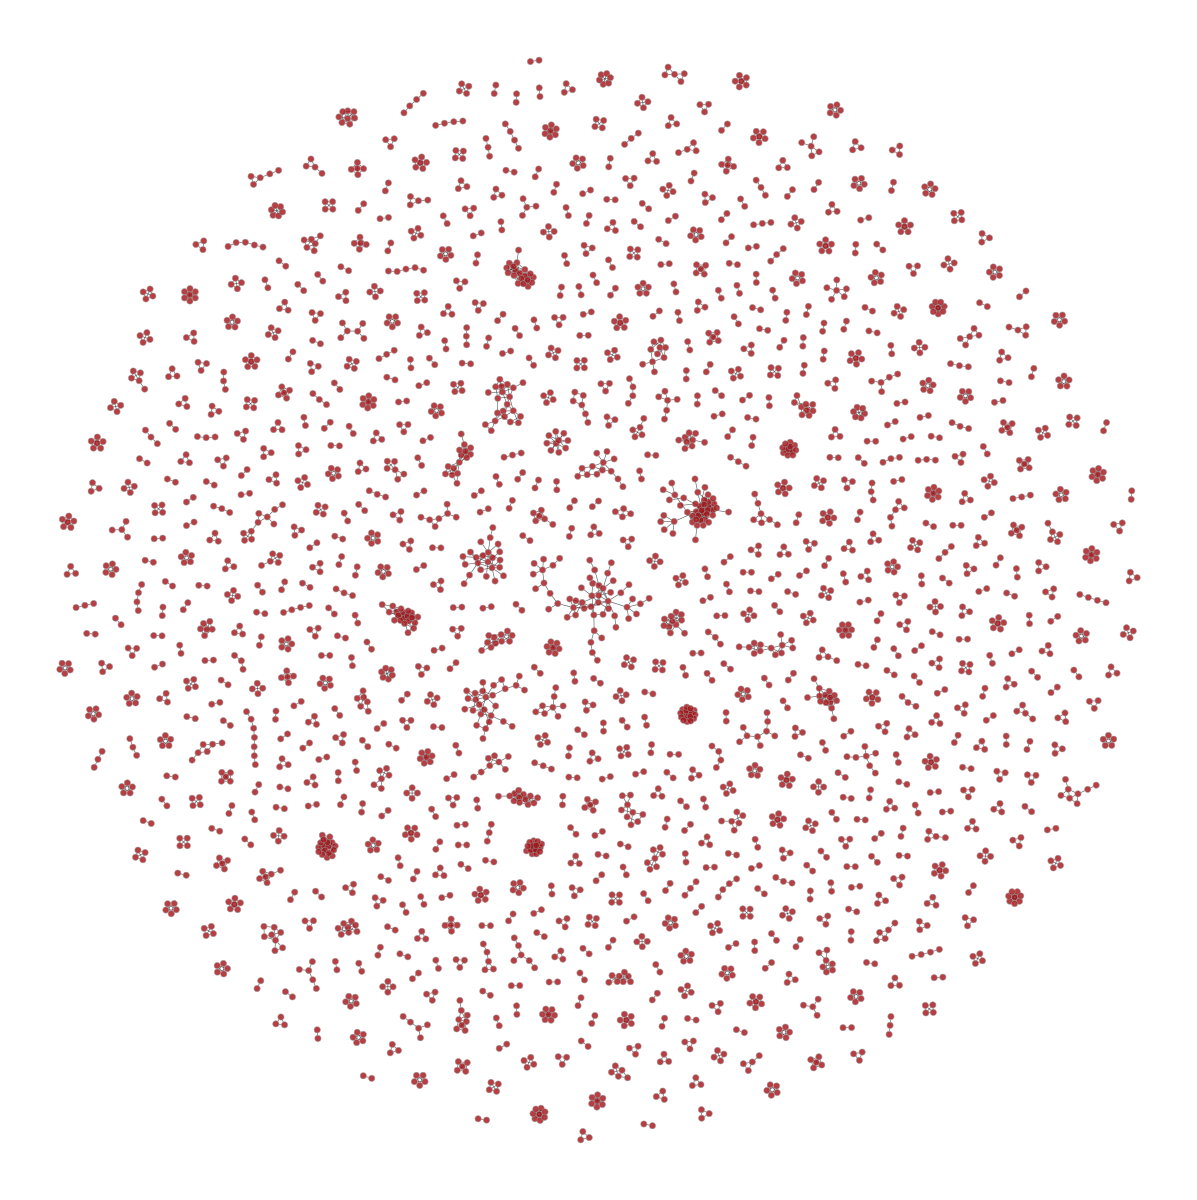

In [5]:
gt.graph_draw(G1);

In [6]:
#print(fname2)
#gt.graph_draw(G2, output=fname2);

In [3]:
LC1 = gt.extract_largest_component(G1, prune=True)
LC1.save(f'../data/graph_data/{tag}/{hashtag}_{timespan}_{tau}_LargestC_{SL1}.graphml')
#LC2 = gt.extract_largest_component(G2, prune=True)

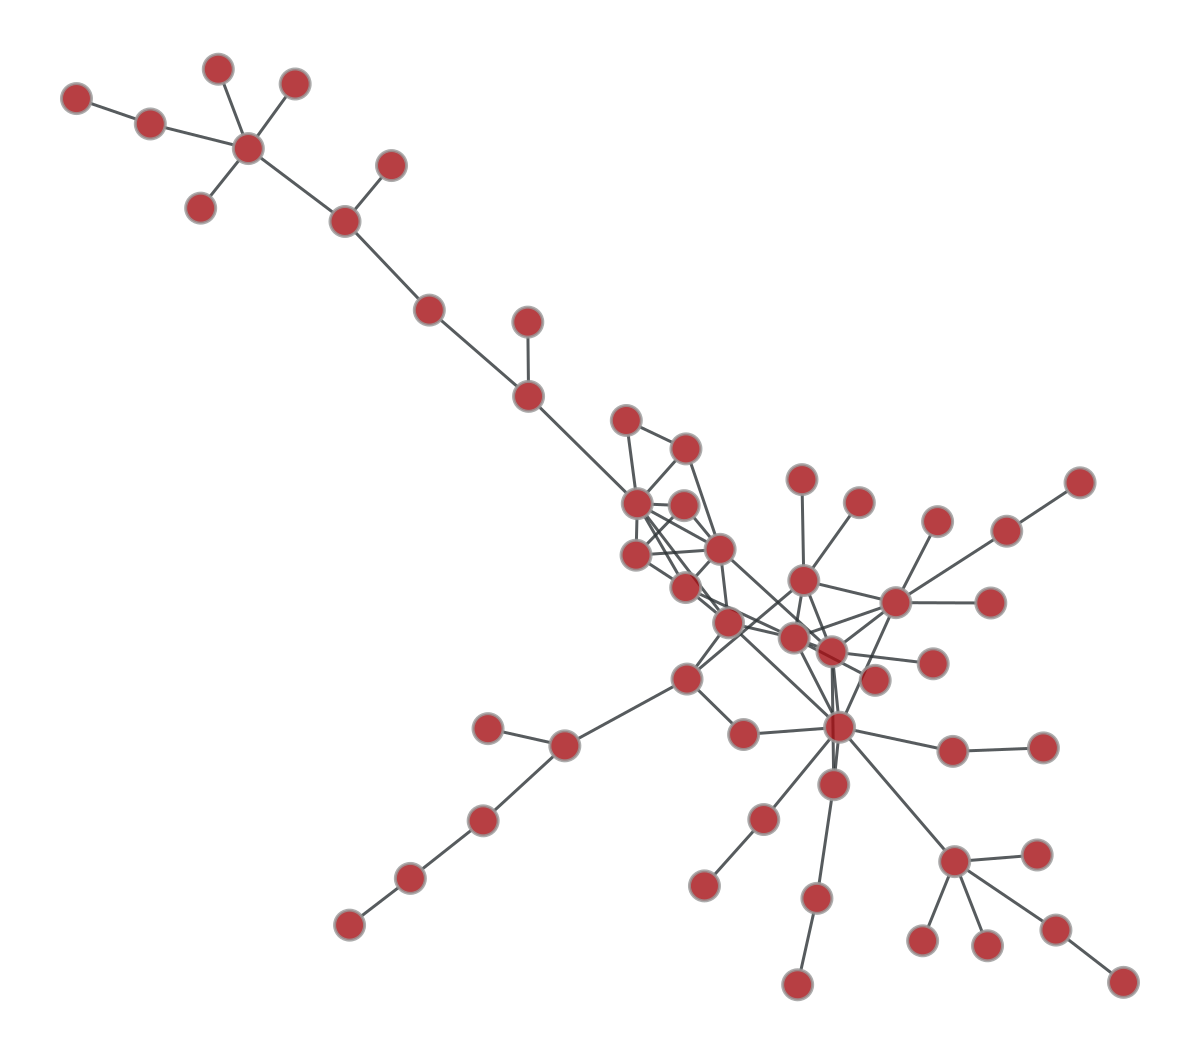

In [8]:
gt.graph_draw(LC1, vertex_size=15);
# ノードラベルを可視化してみる

In [9]:
#print(fname4)
#gt.graph_draw(LC2, output=fname4, output_size=(800,700));
#gt.graph_draw(LC2, output_size=(800,700), vertex_size=7);

In [10]:
nestedOri = gt.minimize_nested_blockmodel_dl(G1)
nested = gt.minimize_nested_blockmodel_dl(LC1)
state = gt.minimize_blockmodel_dl(LC1)

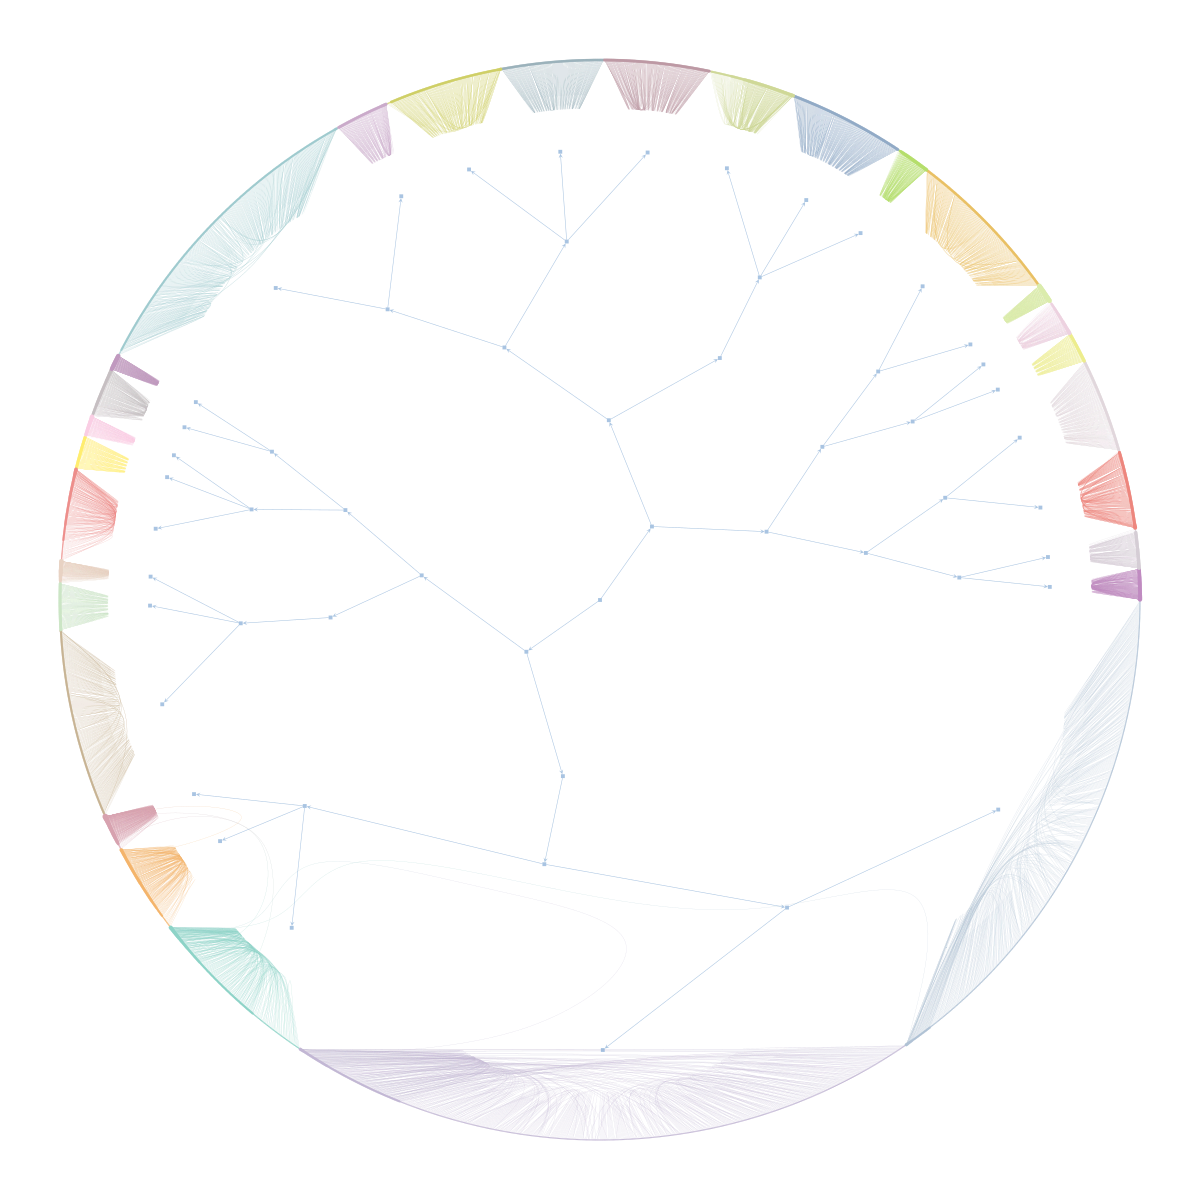

In [11]:
nestedOri.draw();

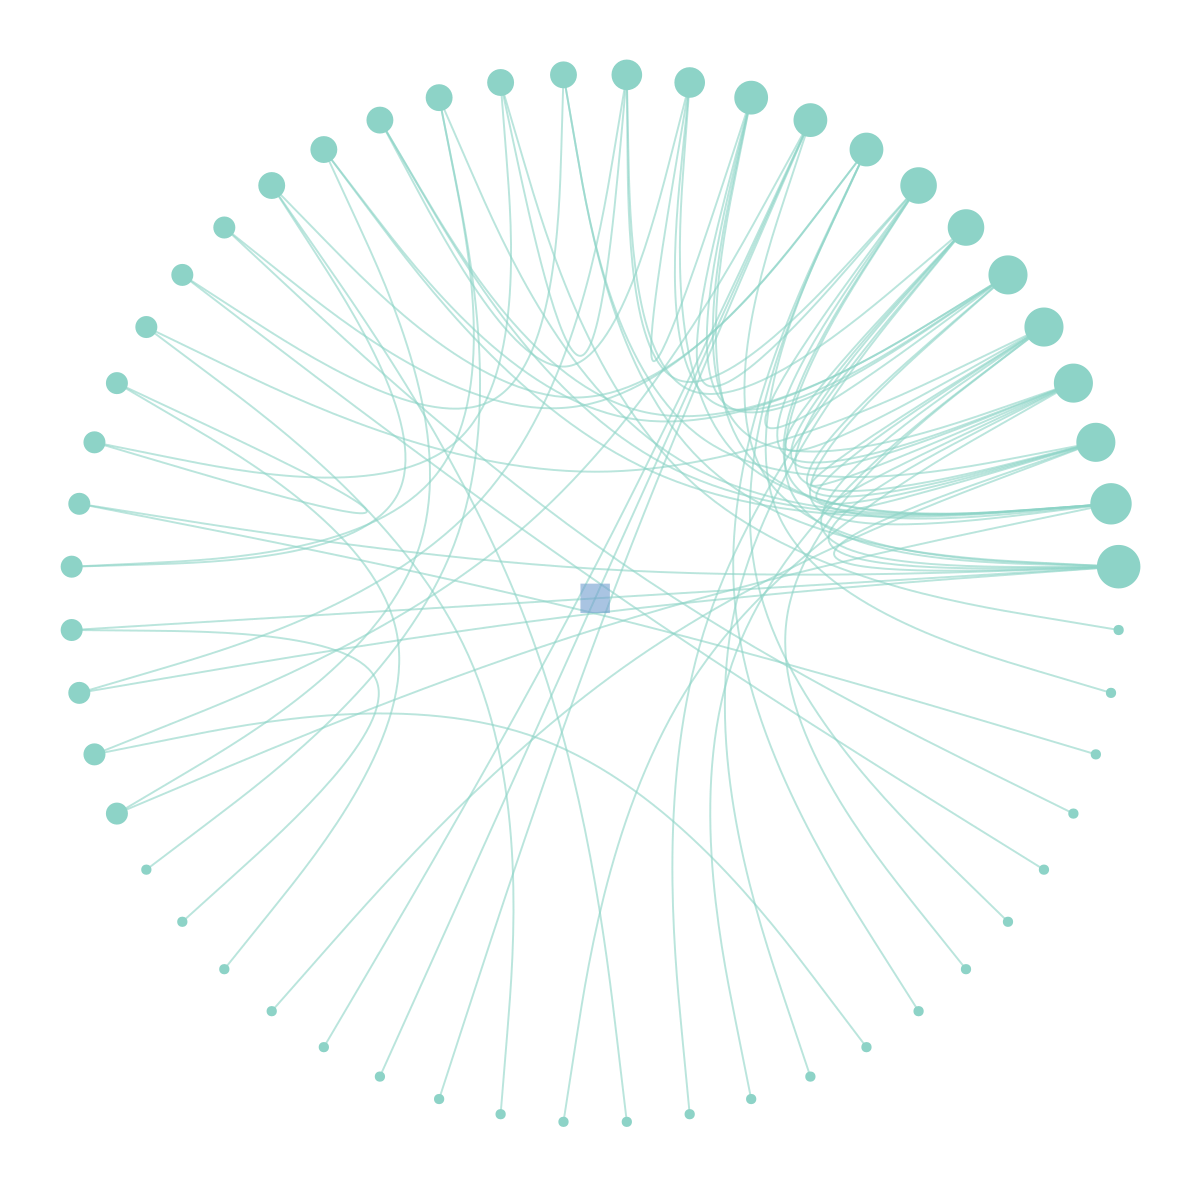

In [12]:
nested.draw();

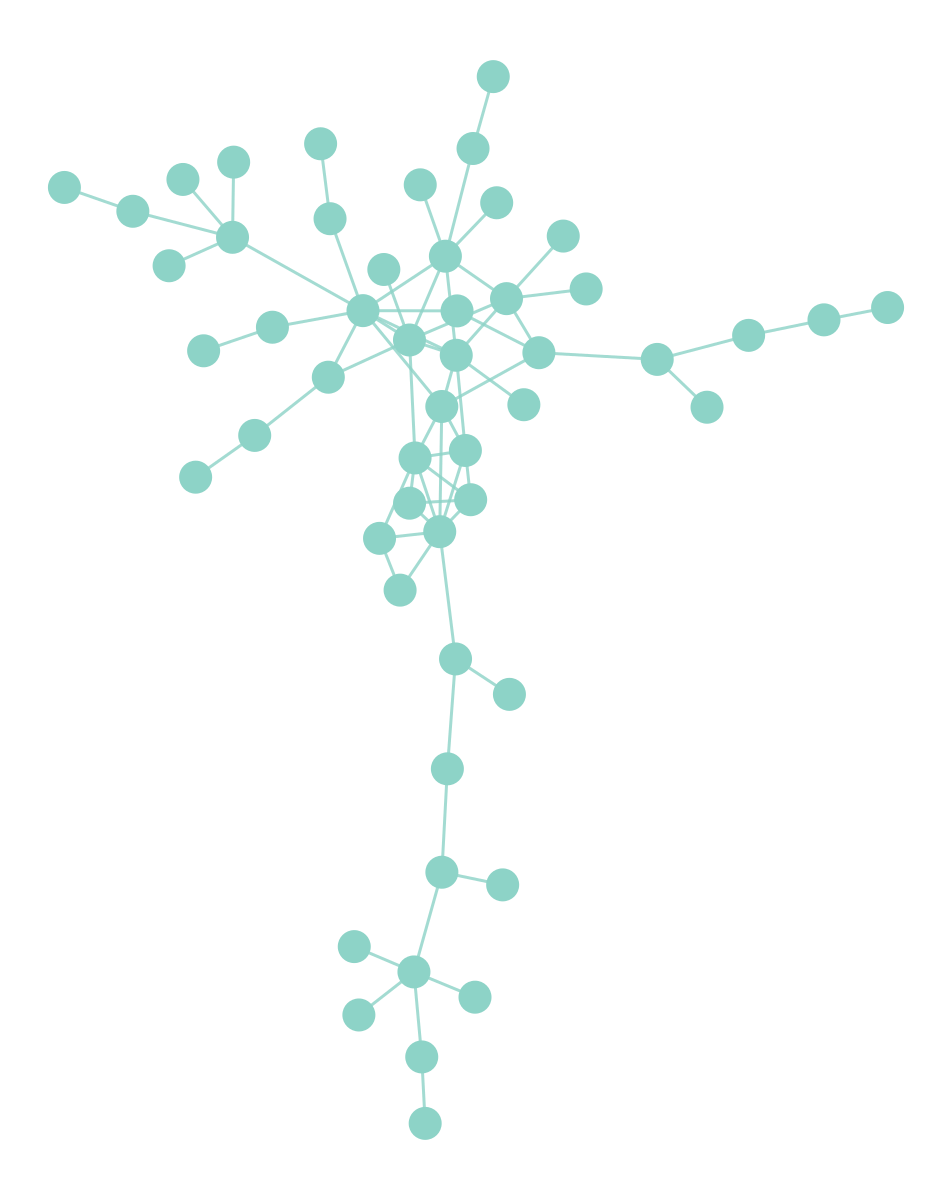

In [13]:
state.draw(vertex_size=15);
#output_size=(1000,800)
# ノードラベルを可視化して，目視でも同じトピックに属しているかどうかを確認する
# 今回「紅葉」のデータだけ特異な性質を示しているのはなぜか

In [14]:
gt.graph_draw(G1, output=fname1);
print(fname1)

../data/figure/network/B0001ALL_紅葉_24-24_75.svg


In [15]:
gt.graph_draw(LC1, vertex_size=15, output=fname3); #, output_size=(800,700)
print(fname3)

../data/figure/network/B0001LargestComponent_紅葉_24-24_75.svg


In [16]:
nested.draw(output=fname5);
print(fname5)

../data/figure/network/B0001NestedCommunity_紅葉_24-24_75.svg


In [17]:
state.draw(vertex_size=15, output=fname6); #output_size=(1000,700), 
print(fname6)

../data/figure/network/B0001Community_紅葉_24-24_75.svg


In [18]:
nestedOri.draw(output=fname7);
print(fname7)

../data/figure/network/B0001AllNestedCommunity_紅葉_24-24_75.svg
